In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [4]:
import neurolib.utils.functions as func

wc = WCModel()
# control model parameters
wc.params['duration'] = 2000
#wc.params['c_excinh'] = 10.1
#wc.params['exc_ext'] = 1.25
# schizophrenia model parameters
#wc.params['inh_ext'] = 
#wc.params['c_inhexc'] = 9.55
#wc.params['c_inhinh'] = 0
#wc.params['sigma_ou'] = 0
#wc.run()

wc.params['exc_ext'] = 0.45
wc.params['c_excinh'] = 10.333333333333334
wc.params['c_inhexc'] = 9.666666666666666
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 1.843
wc.params['sigma_ou'] = 4.2819e-05

#exc_tc = wc.outputs.exc[0,:]

#wc.params['duration'] = 11*1000.
wc.run()
#max_amp_output = np.max(
#      np.max(wc.output[:, wc.t > 1000], axis=1) 
#    - np.min(wc.output[:, wc.t > 1000], axis=1)
#)
#max_output = np.max(wc.output[:, wc.t > 1000])

exc_tc = wc.outputs.exc[0,:]
frs, powers = func.getPowerSpectrum(
    exc_tc,
    wc.params["dt"],
)


#print(max_amp_output)
#print(max_output)


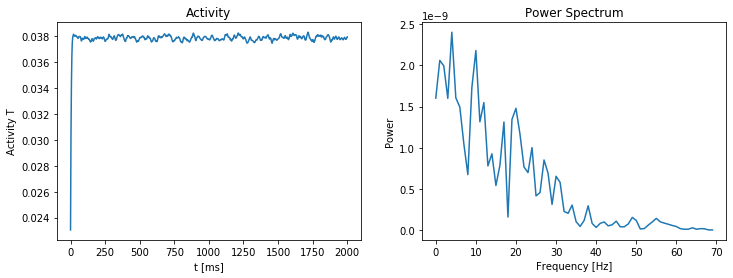

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(wc.t, wc.exc.T)
axs[0].set_title("Activity")
axs[0].set_xlabel("t [ms]")
axs[0].set_ylabel("Activity T")
axs[1].plot(frs, powers)
axs[1].set_title("Power Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Power")

#plt.savefig('tmp.png', dpi=500)